https://machinebox.io/docs/tagbox/recognizing-images

In [1]:
import requests
import os
import io
import base64
from PIL import Image
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

HEADERS = {'content-type': 'application/json'}
ENDPOINT = "http://localhost:8080/tagbox/check"

def download_image(url):
    """"Convenience to download web image."""
    file_name = url.split("/")[-1]
    with open(file_name, "wb") as file:
        response = requests.get(url)
        file.write(response.content)
        print(file_name + " downloaded from " + url)
    return file_name

def print_json(json_data):
    PrettyPrinter().pprint(json_data)

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
url = "https://machinebox.io/samples/images/monkey.jpg"

In [3]:
file_name = download_image(url)

monkey.jpg downloaded from https://machinebox.io/samples/images/monkey.jpg


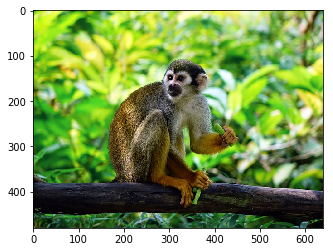

In [4]:
img = plt.imread(file_name)  # Creates an ndarray
plt.imshow(img)
plt.show()

In [6]:
%%time
response = requests.post(ENDPOINT, headers=HEADERS, json={"url": url}).json()

CPU times: user 4.63 ms, sys: 2.06 ms, total: 6.69 ms
Wall time: 1.5 s


In [7]:
print_json(response)

{'custom_tags': [],
 'success': True,
 'tags': [{'confidence': 0.9197548031806946, 'tag': 'Wildlife'},
          {'confidence': 0.8748621940612793, 'tag': 'Animal'},
          {'confidence': 0.8732861876487732,
           'tag': 'Pre-dreadnought battleship'},
          {'confidence': 0.8389277458190918, 'tag': 'Primate'},
          {'confidence': 0.8311088681221008, 'tag': 'Mammal'},
          {'confidence': 0.736111581325531, 'tag': 'Jungle'},
          {'confidence': 0.6977391839027405, 'tag': 'Monkey'},
          {'confidence': 0.5723546147346497, 'tag': 'Rainforest'},
          {'confidence': 0.4915062487125397, 'tag': 'Ape'},
          {'confidence': 0.46555307507514954, 'tag': 'Zoo'}]}
